In [1]:
import random
import heapq
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Constantes
N = 10
ENERGY_START = 50
ENERGY_5_COUNT = 5
ENERGY_10_COUNT = 3
OBSTACLE_MIN = 15
OBSTACLE_MAX = 35

# Representações
CLEAR = 0
OBSTACLE = -1
ENERGY_5 = 5
ENERGY_10 = 10
START = (0, 0)
GOAL = (9, 9)

In [5]:
# Geração do labirinto
def generate_maze():
    maze = [[CLEAR for _ in range(N)] for _ in range(N)]
    
    # Obstáculos
    obstacles = set()
    while len(obstacles) < random.randint(OBSTACLE_MIN, OBSTACLE_MAX):
        x, y = random.randint(0, N-1), random.randint(0, N-1)
        if (x, y) not in [START, GOAL]:
            maze[x][y] = OBSTACLE
            obstacles.add((x, y))

    # Energia +5
    energy5 = set()
    while len(energy5) < ENERGY_5_COUNT:
        x, y = random.randint(0, N-1), random.randint(0, N-1)
        if maze[x][y] == CLEAR and (x, y) not in [START, GOAL]:
            maze[x][y] = ENERGY_5
            energy5.add((x, y))
    # Energia +10
    energy10 = set()
    while len(energy10) < ENERGY_10_COUNT:
        x, y = random.randint(0, N-1), random.randint(0, N-1)
        if maze[x][y] == CLEAR and (x, y) not in [START, GOAL] and (x, y) not in energy5:
            maze[x][y] = ENERGY_10
            energy10.add((x, y))

    return maze

In [6]:
# Heurística de Manhattan
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


In [7]:
# Algoritmo A* com energia
def astar(maze):
    start = START
    goal = GOAL
    frontier = [(0, 0, ENERGY_START, start, [])]
    visited = set()

    while frontier:
        f, g, energy, current, path = heapq.heappop(frontier)
        if current in visited:
            continue
        visited.add(current)
        path = path + [current]

        if current == goal:
            return path, energy

        if energy <= 0:
            continue

        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            x2, y2 = current[0] + dx, current[1] + dy
            if 0 <= x2 < N and 0 <= y2 < N and maze[x2][y2] != OBSTACLE:
                pos = (x2, y2)
                if pos in visited:
                    continue
                next_energy = energy - 1
                if maze[x2][y2] == ENERGY_5:
                    next_energy += 5
                elif maze[x2][y2] == ENERGY_10:
                    next_energy += 10
                h = heuristic(pos, goal)
                heapq.heappush(frontier, (g + 1 + h, g + 1, next_energy, pos, path))

    return None, 0


In [8]:
# Visualizar o labirinto
def plot_maze(maze, path):
    img = np.zeros((N, N, 3), dtype=np.uint8)

    for i in range(N):
        for j in range(N):
            if maze[i][j] == OBSTACLE:
                img[i, j] = [0, 0, 0]
            elif maze[i][j] == ENERGY_5:
                img[i, j] = [0, 255, 0]
            elif maze[i][j] == ENERGY_10:
                img[i, j] = [0, 128, 0]
            else:
                img[i, j] = [255, 255, 255]

    for (x, y) in path:
        img[x, y] = [0, 0, 255]

    img[START[0], START[1]] = [255, 255, 0]
    img[GOAL[0], GOAL[1]] = [255, 0, 0]

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title("Caminho do Robô no Labirinto")
    plt.axis('off')
    plt.show()


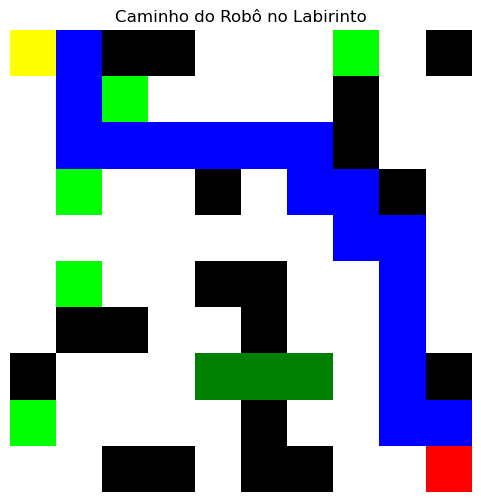

Caminho percorrido: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 6), (3, 7), (4, 7), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (8, 9), (9, 9)]
Passos: 19, Energia restante: 32


In [11]:
# Executar
maze = generate_maze()
path, energy_left = astar(maze)
plot_maze(maze, path if path else [])
print(f"Caminho percorrido: {path}")
print(f"Passos: {len(path) if path else 0}, Energia restante: {energy_left}")